In [4]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
# Read in the dataset
loans = pd.read_csv("C://Users//HP//Downloads//loans.csv")

# Preview the data
loans.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [6]:
#check for null values
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             553 non-null    object 
 1   gender              553 non-null    object 
 2   married             553 non-null    object 
 3   dependents          553 non-null    object 
 4   education           553 non-null    object 
 5   self_employed       553 non-null    object 
 6   applicant_income    553 non-null    int64  
 7   coapplicant_income  553 non-null    float64
 8   loan_amount         553 non-null    float64
 9   loan_amount_term    553 non-null    float64
 10  credit_history      553 non-null    float64
 11  property_area       553 non-null    object 
 12  loan_status         553 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 56.3+ KB


In [7]:
# Remove the loan_id to avoid accidentally using it as a feature
loans.drop(columns=["loan_id"], inplace=True)

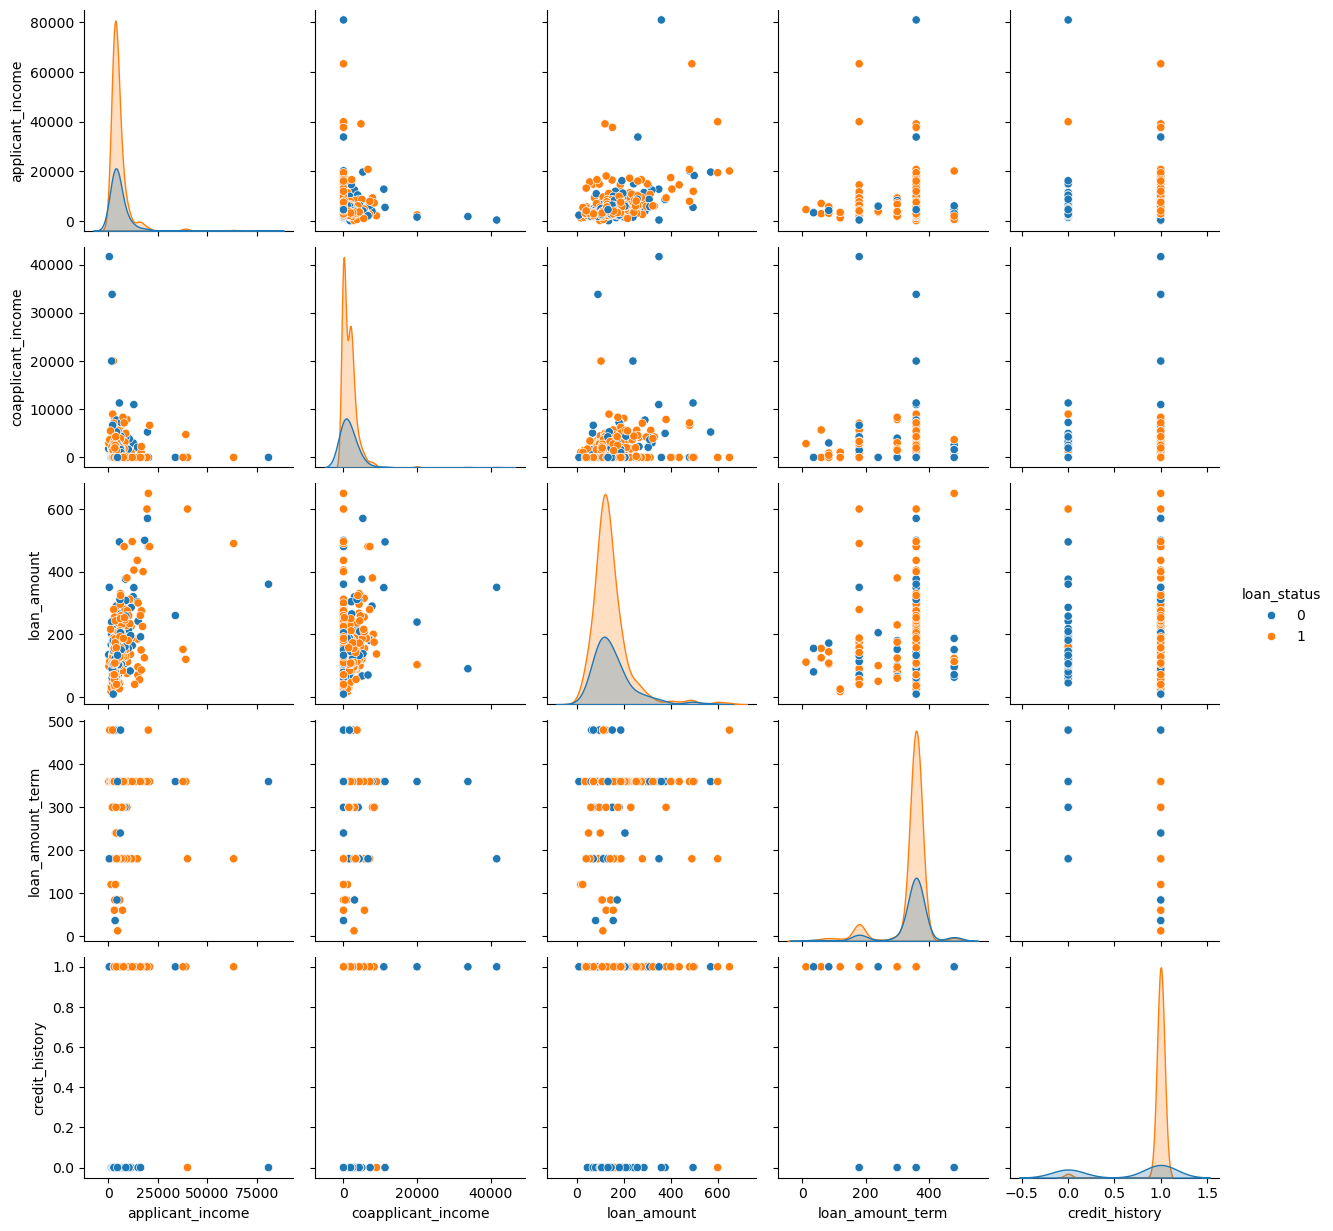

In [8]:
# Use seaborn to look at Distributions and relationships of the columns
sns.pairplot(data=loans, diag_kind="kde", hue="loan_status")
plt.show()

In [9]:
#Separating the numerical columns
corr_loans = loans[["applicant_income", "coapplicant_income", "loan_amount", "loan_amount_term", "credit_history","loan_status"]]

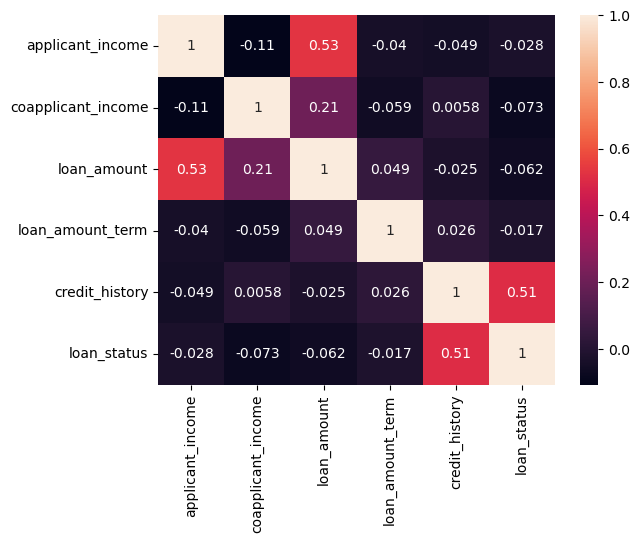

In [10]:
# Correlation between variables
sns.heatmap(corr_loans.corr(), annot=True)
plt.show()

In [11]:
# Frequency of Loan status
loans["loan_status"].value_counts(normalize=True)

loan_status
1    0.703436
0    0.296564
Name: proportion, dtype: float64

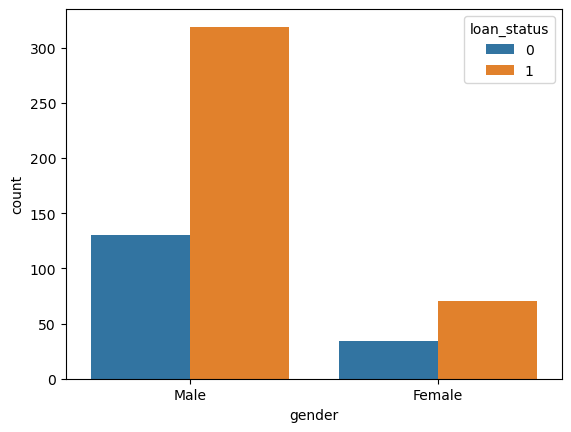

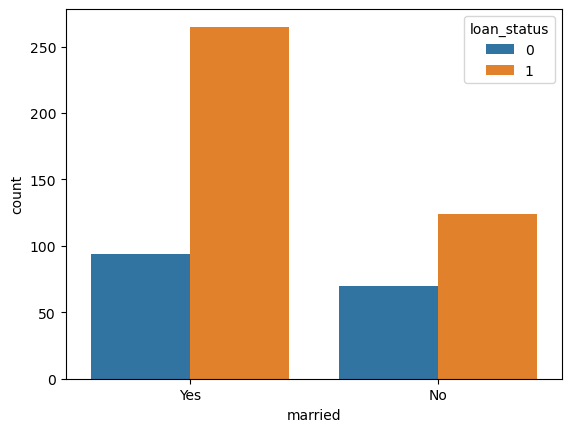

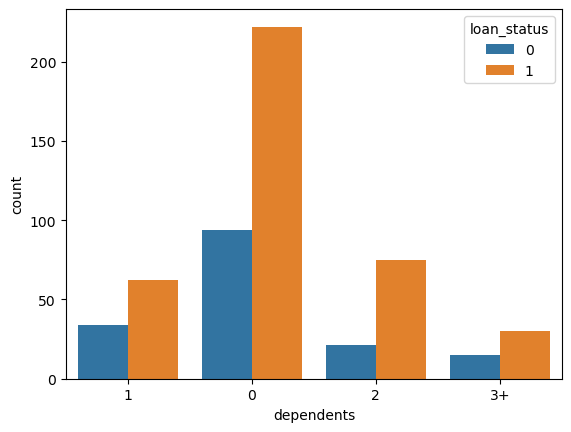

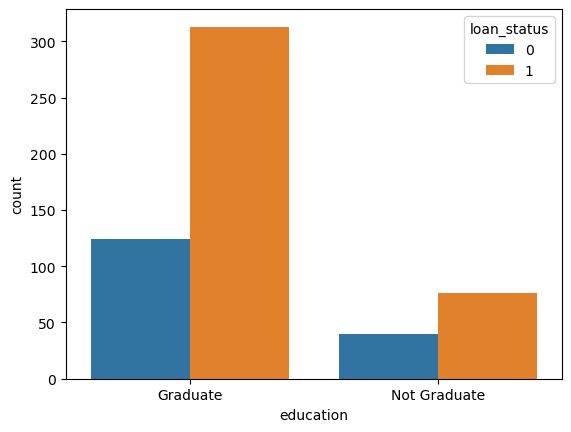

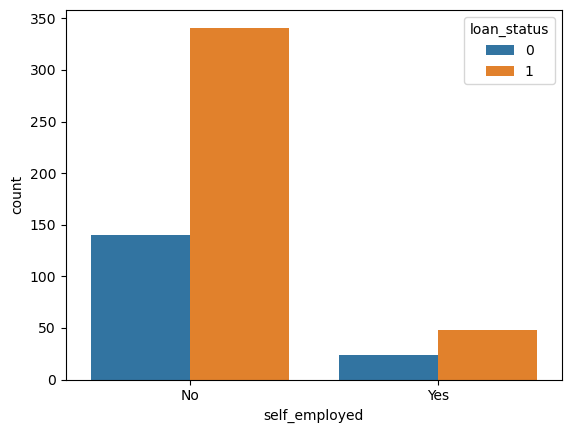

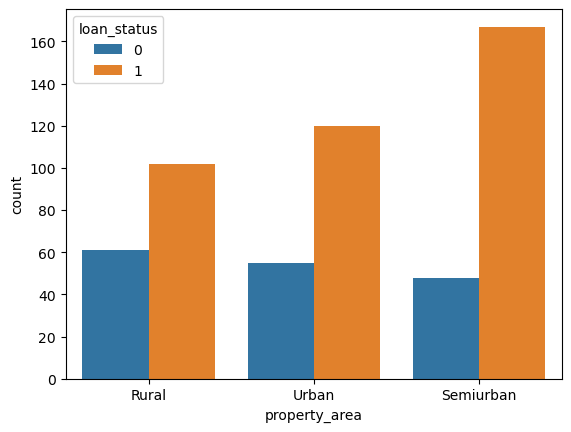

In [12]:
# Class frequency by loan_status
for col in loans.columns[loans.dtypes == "object"]:
    sns.countplot(data=loans, x=col, hue="loan_status")
    plt.show()

# Feaure engineering

In [13]:
# Convert categorical features to binary
loans = pd.get_dummies(loans)

# Previewing the new DataFrame
loans.head()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,4583,1508.0,128.0,360.0,1.0,0,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
1,3000,0.0,66.0,360.0,1.0,1,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
2,2583,2358.0,120.0,360.0,1.0,1,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
3,6000,0.0,141.0,360.0,1.0,1,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
4,5417,4196.0,267.0,360.0,1.0,1,False,True,False,True,...,False,True,False,True,False,False,True,False,False,True


In [14]:
# Split into features and targets
X = loans.drop(columns=["loan_status"])
y = loans[["loan_status"]]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [15]:
# Instantiate logistic regression model
clf = LogisticRegression(random_state=42)

In [16]:
# Fit to the training data
clf.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [17]:
# Predict test set values
y_pred = clf.predict(X_test)

In [18]:
# Accuracy
print(clf.score(X_test, y_test))

0.7951807228915663


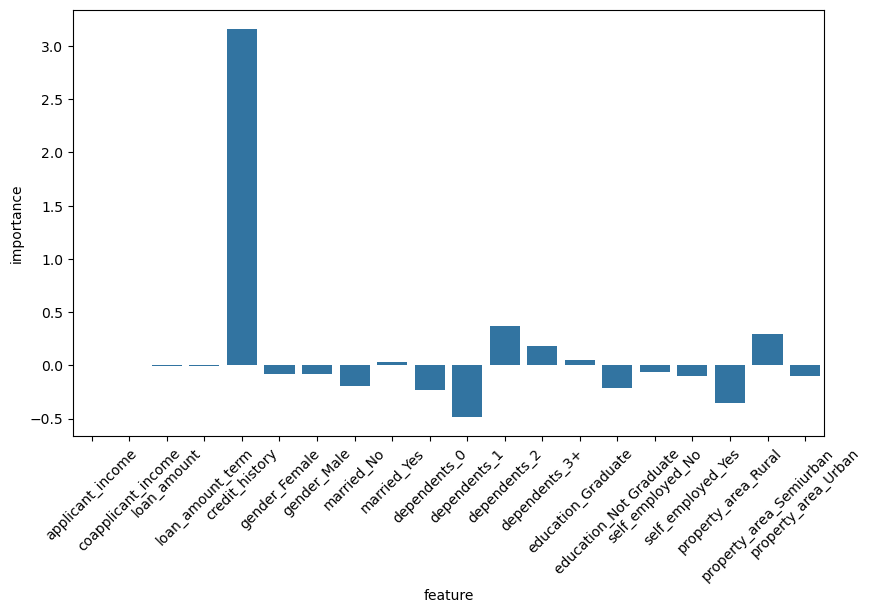

In [19]:
# Finding the importance of features
feature_importance = pd.DataFrame({
    "feature": X_train.columns, 
    "importance": clf.coef_.reshape(-1)})
plt.figure(figsize=(9,5)) 
sns.barplot(data=feature_importance, x="feature", y="importance")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [20]:
# Resplit into features and targets
X = loans.drop(columns=["loan_status","applicant_income","coapplicant_income","married_No","married_Yes","property_area_Urban","self_employed_No","self_employed_Yes"])
y = loans[["loan_status"]]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [21]:
# Fit to the training data
clf.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [22]:
# Predict test set values
y_pred = clf.predict(X_test)

In [23]:
# Accuracy
print(clf.score(X_test, y_test))

0.8012048192771084


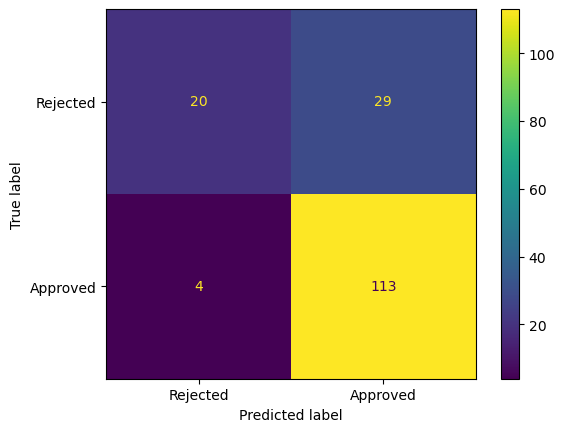

In [24]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=["Rejected", "Approved"])
disp.plot()
plt.show()

# Model could only achieve an 80% accuracy score. I believe a larger dataset would help achieve a better accuracy score.